In [1]:
import numpy as np
import tensorflow as tf
import sklearn
import matplotlib
import pandas as pd

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

In [4]:
base = pd.read_csv('petr4_treinamento.csv')

In [5]:
base = base.dropna()

In [6]:
base_treinamento = base.iloc[:,1:2].values

In [75]:
type(base_treinamento)

numpy.ndarray

In [8]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [10]:
base_treinamento_normalizada.shape

(1242, 1)

In [97]:
X = []
y = []

for i in range (90, 1242):
  X.append(base_treinamento_normalizada[i-90:i,0])
  y.append(base_treinamento_normalizada[i,0])
X, y = np.array(X), np.array(y)

In [122]:
X.shape[1]

90

In [26]:
regressor = Sequential()

regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1, activation='linear'))

In [27]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [30]:
regressor.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - loss: 0.0036 - mean_absolute_error: 0.0470
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0036 - mean_absolute_error: 0.0451
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - loss: 0.0036 - mean_absolute_error: 0.0465
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - loss: 0.0040 - mean_absolute_error: 0.0482
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - loss: 0.0036 - mean_absolute_error: 0.0458
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0035 - mean_absolute_error: 0.0460
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0035 - mean_absolute_error: 0.0455
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0034 - mean_absolute_error: 0.0442
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - loss: 0.0032 - mean_absolute_error: 0.0430
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - loss: 0.0030 - mean_absolute_error: 0.0421
Epoch 11/100

In [83]:
base_teste = pd.read_csv('petr4_teste.csv')

In [112]:
base_teste

array([16.190001, 16.49    , 16.780001, 16.700001, 16.74    , 17.030001,
       16.92    , 16.879999, 17.040001, 17.32    , 17.35    , 17.92    ,
       18.35    , 18.309999, 18.26    , 18.4     , 18.42    , 19.34    ,
       19.620001, 19.67    , 19.77    , 19.74    ])

In [85]:
base_teste = base_teste.iloc[:,1].values

In [102]:
base_completa = np.append(base_treinamento,base_teste)

In [89]:
base_completa_normalizada = normalizador.transform(base_completa.reshape(-1,1))

In [91]:
base_completa_normalizada.shape

(1264, 1)

In [92]:
y_teste = base_completa_normalizada[-22:]

In [125]:
X_teste = []
for i in range (1242, 1264):
  X_teste.append(base_completa_normalizada[i-90:i,0])

X_teste = np.array(X_teste)


In [131]:
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [132]:
X_teste

array([[[-0.63128537],
        [-0.67877142],
        [-0.67039153],
        ...,
        [-0.05586622],
        [-0.02513995],
        [-0.02513995]],

       [[-0.67877142],
        [-0.67039153],
        [-0.74301725],
        ...,
        [-0.02513995],
        [-0.02513995],
        [ 0.        ]],

       [[-0.67039153],
        [-0.74301725],
        [-0.65363175],
        ...,
        [-0.02513995],
        [ 0.        ],
        [ 0.08379863]],

       ...,

       [[-0.16480479],
        [-0.11173215],
        [-0.09217908],
        ...,
        [ 0.62290492],
        [ 0.87988823],
        [ 0.95810083]],

       [[-0.11173215],
        [-0.09217908],
        [-0.13687183],
        ...,
        [ 0.87988823],
        [ 0.95810083],
        [ 0.97206703]],

       [[-0.09217908],
        [-0.13687183],
        [-0.22905062],
        ...,
        [ 0.95810083],
        [ 0.97206703],
        [ 1.        ]]])

In [133]:
previsão = regressor.predict(X_teste)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

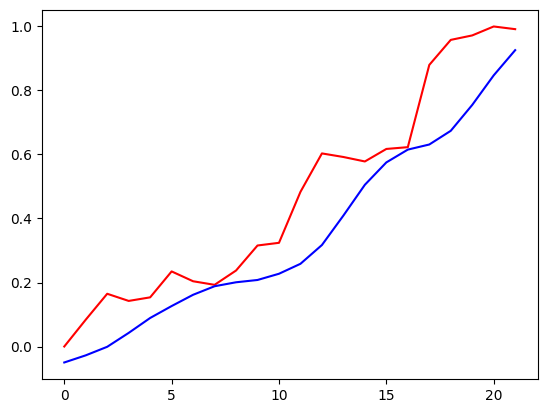

In [130]:
plt.plot(y_teste, color='red', label='Preço real')
plt.plot(previsão, color='blue', label='Previsão')